# Análisis por discriminación lineal (LDA)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Datos

Supongamos que tenemos dos distribuciones normales multivariadas. Es decir, cada distribución tiene media 0. Y cada distribución tiene 5000 muestras.

In [ ]:
mu0 = [0, 0]
sigma0 = np.array([[1, 0.5], [0.5, 1]])
sigma1 = np.array([[1, 0.5], [0.5, 1]])

X = np.random.multivariate_normal(mu0, sigma0, 5000)
X

array([[-0.79926512, -0.47148994],
       [-1.03163057,  1.09126605],
       [-1.30883273,  0.20593309],
       ...,
       [ 0.38869465,  2.17570195],
       [-1.79539646, -0.98026522],
       [-0.05519454,  1.50559767]])

In [ ]:
X[2000:, 0] = X[2000:, 0] + 2
X[2000:, 1] = X[2000:, 1] + 2

In [ ]:
y = np.ones((5000,))
y[:2000] = 0

In [ ]:
X[:6, :], y[:6]

(array([[-0.79926512, -0.47148994],
        [-1.03163057,  1.09126605],
        [-1.30883273,  0.20593309],
        [ 0.92186505,  1.43439924],
        [-1.49012289, -2.00240903],
        [ 0.40327317, -0.00654702]]),
 array([0., 0., 0., 0., 0., 0.]))

### Visualización

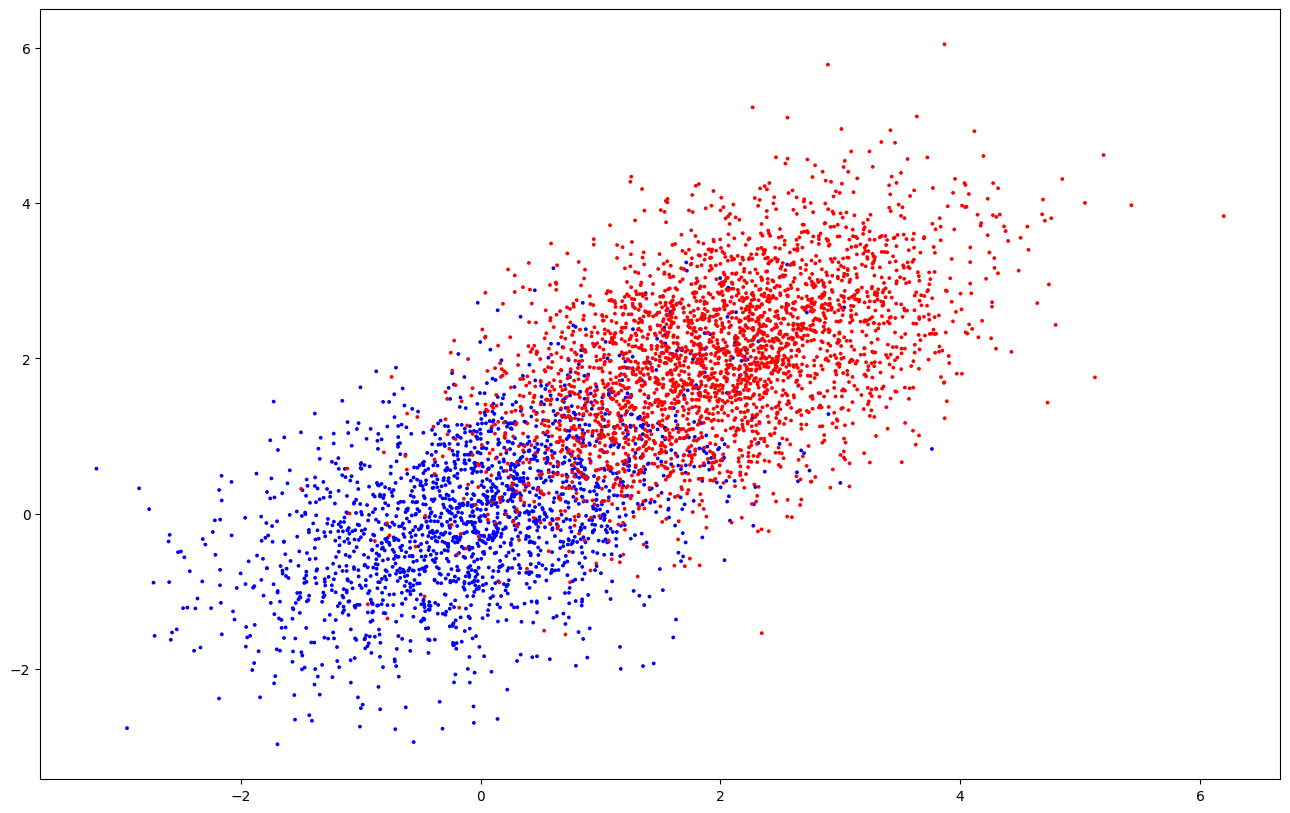

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
plt.show()

### Regla de Clasificación

Tenemos que:

$$ f(x \vert y) = \frac{1}{\vert 2 \pi \Sigma \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu)^T (\Sigma)^{-1} (x - \mu)\big) $$

En el caso de clasificación binaria (como el caso anterior), podemos expresar los dos tipos de casos de probabilidad condicional que $y=0$ y $y=1$.

$$ f(x \vert y=0) = \frac{1}{\vert 2 \pi \Sigma^{(0)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(0)})^T (\Sigma^{(0)})^{-1} (x - \mu^{(0)})\big)\\
f(x \vert y=1) = \frac{1}{\vert 2 \pi \Sigma^{(1)} \vert^{\frac{1}{2}}} \text{exp} \big( -\frac{1}{2} (x - \mu^{(1)})^T (\Sigma^{(1)})^{-1} (x - \mu^{(1)})\big) $$


In [ ]:
mu0 = np.array([[0], [0]])
mu1 = np.array([[2], [2]])

def f_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0), 1/2))
    return const * np.exp(-0.5 * (x - mu0).T @ np.linalg.inv(sigma0) @ (x - mu0))[0, 0]

def f_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1), 1/2))
    return const * np.exp(-0.5 * (x - mu1).T @ np.linalg.inv(sigma1) @ (x - mu1))[0, 0]

In [ ]:
f_x_y_0(np.array([[0.5], [0.5]]))

0.1555632781262252

In [ ]:
f_x_y_1(np.array([[0.5], [0.5]]))

0.041006034909973794

Media muestral y covarianza muestral.

In [ ]:
mu0_hat = np.mean(X[:2000, :], axis=0)
sigma0_hat = np.cov(X[:2000, :].T)
mu0_hat, sigma0_hat

(array([-0.01912995, -0.00376611]),
 array([[0.97038778, 0.45875649],
        [0.45875649, 0.96186709]]))

In [ ]:
mu1_hat = np.mean(X[2000:, :], axis=0)
sigma1_hat = np.cov(X[2000:, :].T)
mu1_hat, sigma1_hat

(array([1.9804446 , 2.00490266]),
 array([[0.95617787, 0.50029585],
        [0.50029585, 1.04407353]]))

In [ ]:
def fhat_x_y_0(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma0_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu0_hat).T @ np.linalg.inv(sigma0_hat) @ (x - mu0_hat))[0, 0]

def fhat_x_y_1(x):
    const = 1 / (2 * np.pi * np.power(np.linalg.det(sigma1_hat), 1/2))
    return const * np.exp(-0.5 * (x - mu1_hat).T @ np.linalg.inv(sigma1_hat) @ (x - mu1_hat))[0, 0]

In [ ]:
fhat_x_y_0(np.array([[0.5], [0.5]]))

0.15492822595442746

In [ ]:
fhat_x_y_1(np.array([[0.5], [0.5]]))

0.04254375198351935

De hecho, ya conocemos la distribución de la etiqueta. Usando esto, podemos calcular la probabilidad de Bayes. La fórmula de la regla de Bayes es la siguiente:

$$ P(Y = y \vert X = x) = \frac{f(x \vert Y = y)P(Y = y)}{f(x \vert y = 0) P(Y = 0) + f(x \vert y=1)P(Y=1)} $$

In [ ]:
p0 = 2000/5000
p1 = 1 - p0

def bayes_prob(x, y):
    if y == 1:
        return f_x_y_1(x) * p1 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)
    else:
        return f_x_y_0(x) * p0 / (f_x_y_0(x) * p0 + f_x_y_1(x) * p1)

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 0)

0.7166425945408171

In [ ]:
bayes_prob(np.array([[0.5], [0.5]]), 1)

0.2833574054591828

In [ ]:
p0_hat = 2000 / 5000
p1_hat = 3000 / 5000

def bayes_prob_hat(x, y):
    if y == 1:
        return fhat_x_y_1(x) * p1_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)
    else:
        return fhat_x_y_0(x) * p0_hat / (fhat_x_y_0(x) * p0_hat + fhat_x_y_1(x) * p1_hat)

bayes_prob_hat(np.array([[0.5], [0.5]]), 0), bayes_prob_hat(np.array([[0.5], [0.5]]), 1)

(0.7082632182397856, 0.2917367817602145)

Se confirma que el dato (`[0.5], [0.5]`) se clsifica con la etiqueta `0`.

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1, solver='svd', store_covariance=True).fit(X, y)

In [ ]:
lda.means_

array([[-0.01912995, -0.00376611],
       [ 1.9804446 ,  2.00490266]])

In [ ]:
mu0 = lda.means_[0, :]
mu1 = lda.means_[1, :]
lda_cov = lda.covariance_

mu0, mu1, lda_cov

(array([-0.01912995, -0.00376611]),
 array([1.9804446 , 2.00490266]),
 array([[0.96147652, 0.48348829],
        [0.48348829, 1.01078977]]))

Usando un discriminador entrenado, podemos calcular la probabilidad de cada etiqueta. Para hacer esto, necesitamos implementar la función delta para expresarlo.
La fórmula de la función delta es así.

$$ \delta_k(x) = x^T \Sigma^{-1} \mu_k - \frac{1}{2} \mu^T_k \Sigma^{-1} \mu_k + \log \pi_k $$



In [ ]:
def discriminator(x):
    d0 = x.T @ np.linalg.inv(lda_cov) @ mu0 - 0.5 * mu0.T @ np.linalg.inv(lda_cov) @ mu0 + np.log(p0)
    d1 = x.T @ np.linalg.inv(lda_cov) @ mu1 - 0.5 * mu1.T @ np.linalg.inv(lda_cov) @ mu1 + np.log(p1)
    return [d0[0], d1[0]]

In [ ]:
discriminator(np.array([[0.5], [0.5]]))

[-0.9245561784937734, -1.8569880436629371]

In [ ]:
np.argmax(discriminator(np.array([[0.5], [0.5]])))

0

¿Qué pasa con la precisión del modelo LDA ajustado?

In [ ]:
y_hat = np.apply_along_axis(lambda x: np.argmax(discriminator(np.reshape(x, (2, 1)))), 1, X)

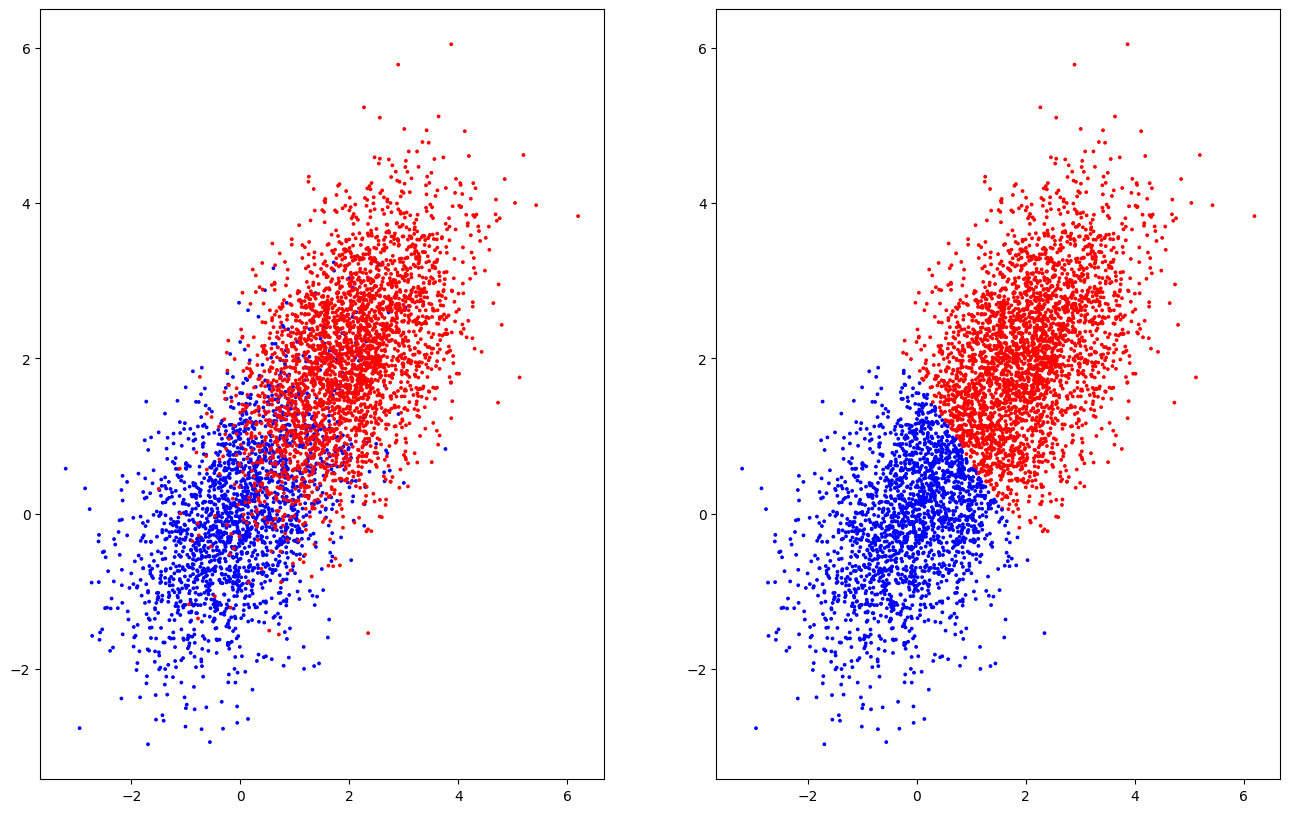

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y)))
ax[1].scatter(X[:, 0], X[:, 1], s=3, c=list(map(lambda x:'blue' if x==0 else 'red', y_hat)))
plt.show()

In [ ]:
(y == y_hat).mean()

0.883